# CDS503 - Machine Learning Final Project

Universiti Sains Malaysia


Group 11 - **Wine Quality Prediction Using Classification**

Members:
- JIN WENHUA
- MA RU
- GUO ZIRUI
- CHEN wenxian

## Overview

### Experiment Set 1: Comparing machine learning algorithms  
* JIN WENHUA
### Experiment Set 2: Selecting features
* MA RU
### Experiment Set 3: Ensemble learning
* CHEN WENXIAN 
### Experiment Set 4: Varying training sample size
* GUO ZIRUI


# 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np



In [2]:
df = pd.read_csv('winequality-white.csv', delimiter = ';')
#display the metadata or summary of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
df.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.0            0.15              0.28         14.7            0.051      29.0                 149.0                 0.99792  2.96  0.39       9.0      7          8
7.3            0.19              0.27         13.9            0.057      45.0                 155.0                 0.99807  2.94  0.41       8.8      8          8
7.4            0.16              0.30         13.7            0.056      33.0                 168.0                 0.99825  2.90  0.44       8.7      7          7
6.8            0.18              0.30         12.8            0.062      19.0                 171.0                 0.99808  3.00  0.52       9.0      7          7
7.4            0.19              0.30         12.8            0.053      48.5                 229.0                 0.99860  3.14  0.49       9.1      7          6
                     

<AxesSubplot:>

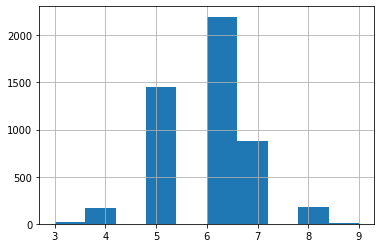

In [4]:
df['quality'].hist()

In [5]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [6]:
df['alcohol'].value_counts()

9.400000     229
9.500000     228
9.200000     199
9.000000     185
10.000000    162
            ... 
14.050000      1
11.366667      1
11.066667      1
11.350000      1
12.050000      1
Name: alcohol, Length: 103, dtype: int64

<AxesSubplot:>

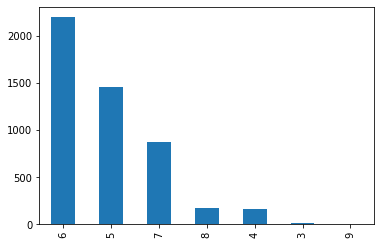

In [7]:
df['quality'].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

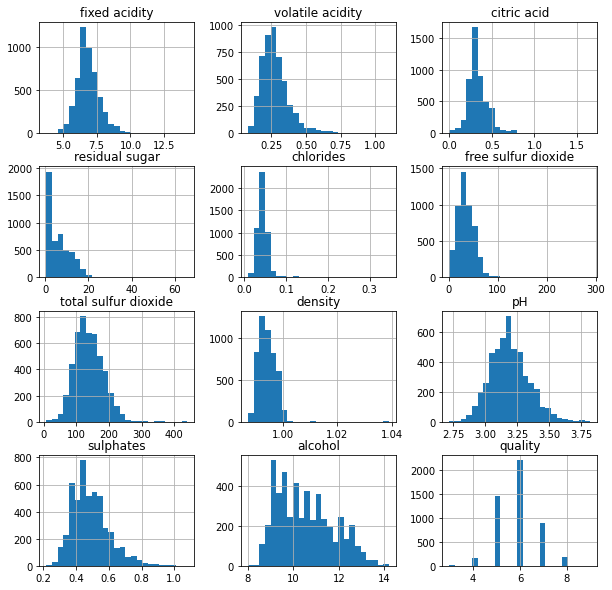

In [8]:
df.hist(bins=25,figsize=(10,10))
# display histogram
#plt.show()

In [9]:
cut_bins = [1, 4, 6, 9]
df['quality'] = pd.cut(df['quality'], bins = cut_bins, labels = [0, 1, 2])
df['quality'].value_counts()

1    3655
2    1060
0     183
Name: quality, dtype: int64